<a href="https://colab.research.google.com/github/Vidiii/Python_Projects/blob/main/Cleantech_solar_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (24, 14)

In [8]:
data=pd.read_excel("Assignment_dataset.xlsx")
data

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440
...,...,...,...
977,2022-03-20,4.226183,81.632738
978,2022-03-21,3.431675,71.057353
979,2022-03-22,3.580492,81.631509
980,2022-03-23,4.997617,71.906149


In [9]:
condition = [(data['Date'] >= pd.to_datetime('2019-07-01')) & (data['Date']<= pd.to_datetime('2020-06-30')),
             (data['Date'] >= pd.to_datetime('2020-07-01')) & (data['Date']<= pd.to_datetime('2021-06-30')),
             (data['Date'] >= pd.to_datetime('2021-07-01'))
             ]
values = [73.9, 73.3, 72.7]
data['Budget'] = np.select(condition, values)
data

,Date,GHI,PR,Budget
0,2019-07-01,3.256608,69.575676,73.9
1,2019-07-02,3.976767,79.314411,73.9
2,2019-07-03,2.811867,61.020006,73.9
3,2019-07-04,3.658408,83.262576,73.9
4,2019-07-05,5.590683,82.124440,73.9
...,...,...,...,...
977,2022-03-20,4.226183,81.632738,72.7
978,2022-03-21,3.431675,71.057353,72.7
979,2022-03-22,3.580492,81.631509,72.7
980,2022-03-23,4.997617,71.906149,72.7


In [10]:
#checking for any data above budget

count = 0
for i in range(981):
  if(data.PR[i] > data.Budget[i]):
    count+=1
count

475

Finding average Pr for last 7, 30, 60, 90, 365 days and lifetime

In [11]:
avg_7 = np.mean(data['PR'].tail(7))
print("Average PR last 7-d: ", avg_7)

avg_30 = np.mean(data['PR'].tail(30))
print("Average PR last 30-d: ", avg_30)

avg_60 = np.mean(data['PR'].tail(60))
print("Average PR last 60-d: ", avg_60)

avg_90 = np.mean(data['PR'].tail(90))
print("Average PR last 90-d: ", avg_90)

avg_365 = np.mean(data['PR'].tail(365))
print("Average PR last 365-d: ", avg_365)

avg_lifetime = np.mean(data['PR'])
print("Average PR Lifetime: ", avg_lifetime)

Average PR last 7-d:  73.80366172456165
Average PR last 30-d:  71.85599481656264
Average PR last 60-d:  73.00926396506686
Average PR last 90-d:  73.05061490657476
Average PR last 365-d:  72.65386473002853
Average PR Lifetime:  72.64860790714279


In [12]:
data['SMA30'] = data['PR'].rolling(30).mean()
data

,Date,GHI,PR,Budget,SMA30
0,2019-07-01,3.256608,69.575676,73.9,NaN
1,2019-07-02,3.976767,79.314411,73.9,NaN
2,2019-07-03,2.811867,61.020006,73.9,NaN
3,2019-07-04,3.658408,83.262576,73.9,NaN
4,2019-07-05,5.590683,82.124440,73.9,NaN
...,...,...,...,...,...
977,2022-03-20,4.226183,81.632738,72.7,71.181262
978,2022-03-21,3.431675,71.057353,72.7,70.789540
979,2022-03-22,3.580492,81.631509,72.7,71.231840
980,2022-03-23,4.997617,71.906149,72.7,71.249772


Dataframe according to GHI

In [13]:
lt2 = data[data.GHI < 2]
btw2_4 = data[(data.GHI >= 2) & (data.GHI <= 4)]
btw4_6 = data[(data.GHI >= 4) & (data.GHI <= 6)]
gt6 = data[data.GHI > 6]

Graph

In [14]:
import matplotlib.patches as mp

<Figure size 1728x1008 with 0 Axes>

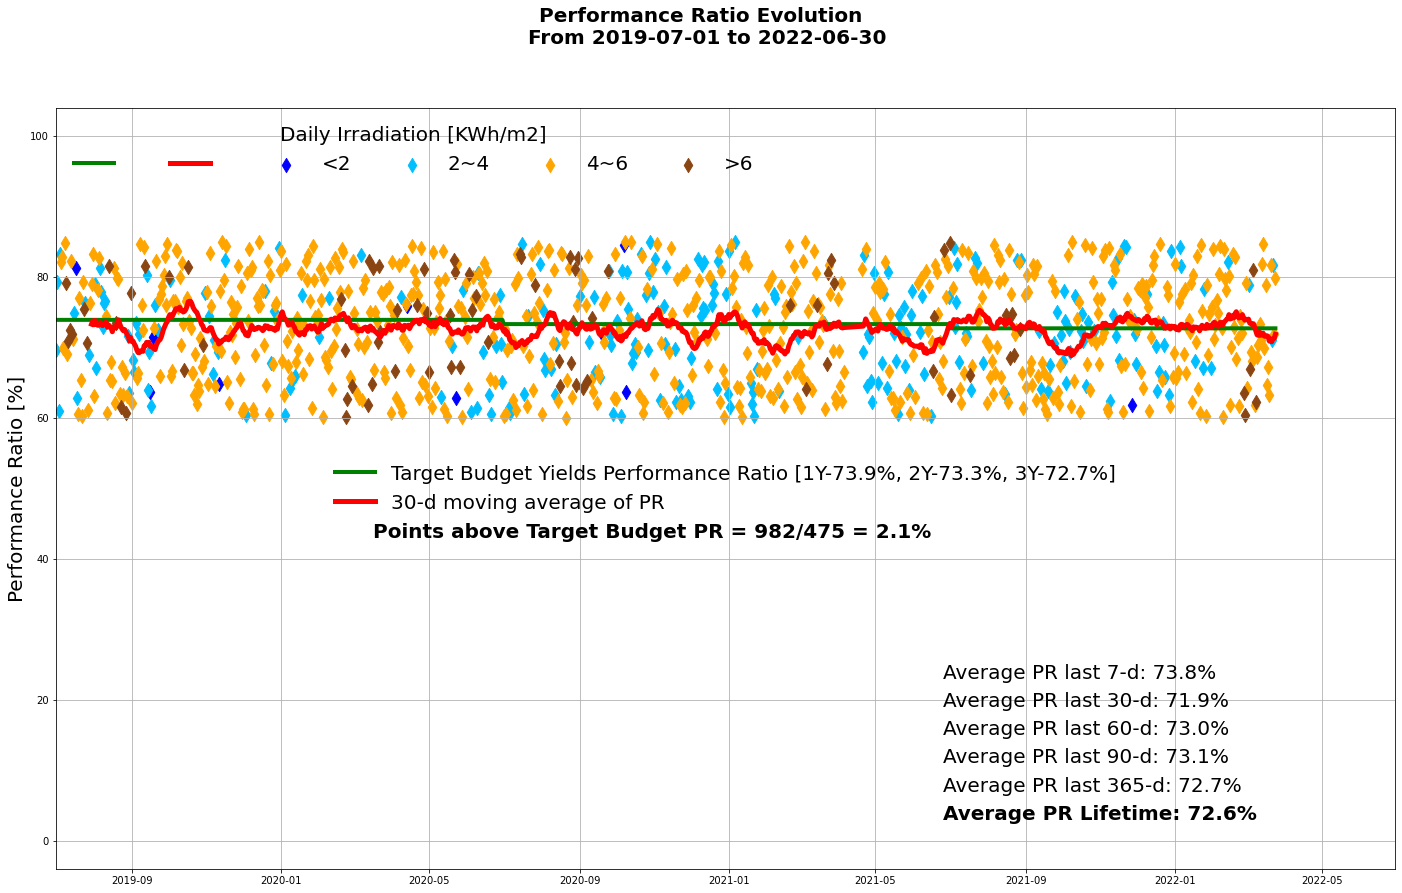

In [28]:
plt.figure()
fig, ax = plt.subplots()

#Scatter Plot (Date vs PR)
sp1 = plt.scatter(x=lt2['Date'], y=lt2['PR'], marker='d', s=100, c='b')
sp2 = plt.scatter(x=btw2_4['Date'], y=btw2_4['PR'], marker='d', s=100, color="deepskyblue")
sp3 = plt.scatter(x=btw4_6['Date'], y=btw4_6['PR'], marker='d', s=100, c='orange')
sp4 = plt.scatter(x=gt6['Date'], y=gt6['PR'], marker='d', s=100, c='saddlebrown')

#Line Plot (Date vs Budget)
ax.plot(data['Date'], data['Budget'], color = 'g', linewidth = 4.0)

#Line plot (Date vs 30-d moving average of PR)
ax.plot(data['Date'], data['SMA30'], color='red', linewidth=5.0)

#set limit for x, y axis
plt.xlim(xmin=pd.to_datetime('2019-07-01'), xmax=pd.to_datetime('2022-06-30'))
plt.ylim(ymin=-4, ymax=104)

plt.text(pd.to_datetime('2020-03-16'), 43,
         'Points above Target Budget PR = 982/{} = {:.1f}%'.format(count, 982/count),
         {'weight':'bold'}, fontsize=20)


plt.text(pd.to_datetime('2021-06-25'), 23, 'Average PR last 7-d: {:.1f}%'.format(avg_7), fontsize=20)
plt.text(pd.to_datetime('2021-06-25'), 19, 'Average PR last 30-d: {:.1f}%'.format(avg_30), fontsize=20)
plt.text(pd.to_datetime('2021-06-25'), 15, 'Average PR last 60-d: {:.1f}%'.format(avg_60), fontsize=20)
plt.text(pd.to_datetime('2021-06-25'), 11, 'Average PR last 90-d: {:.1f}%'.format(avg_90), fontsize=20)
plt.text(pd.to_datetime('2021-06-25'), 7, 'Average PR last 365-d: {:.1f}%'.format(avg_365), fontsize=20)
plt.text(pd.to_datetime('2021-06-25'), 3, 'Average PR Lifetime: {:.1f}%'.format(avg_lifetime), {'weight':'bold'}, fontsize=20)

#legend
lines=plt.gca().get_lines()
legend1 = plt.legend([lines[0], lines[1]], ['Target Budget Yields Performance Ratio [1Y-73.9%, 2Y-73.3%, 3Y-72.7%]', 
                                            '30-d moving average of PR'], loc='center', fontsize=20, frameon=False)

ax=plt.gca()
leg=ax.get_legend()
# leg.get_texts()[0].set_color('Green')
# leg.get_texts()[1].set_color('red')

plt.legend(title='Daily Irradiation [KWh/m2]', loc='upper left', 
           labels = ['','', '<2', '2~4', '4~6', '>6'], fontsize=20,
           ncol=7, frameon=False, title_fontsize=20)

plt.gca().add_artist(legend1)

#Add grid
plt.grid()

plt.ylabel('Performance Ratio [%]', fontsize=20)
plt.xlabel('')

#title
fig.suptitle('Performance Ratio Evolution \n From 2019-07-01 to 2022-06-30', 
             fontsize=20, fontweight="bold")

plt.show()
print('')


